### Wine 
### 

<a href="https://archive.ics.uci.edu/dataset/186/wine+quality">Wine Quality from UCI dataset.</a>

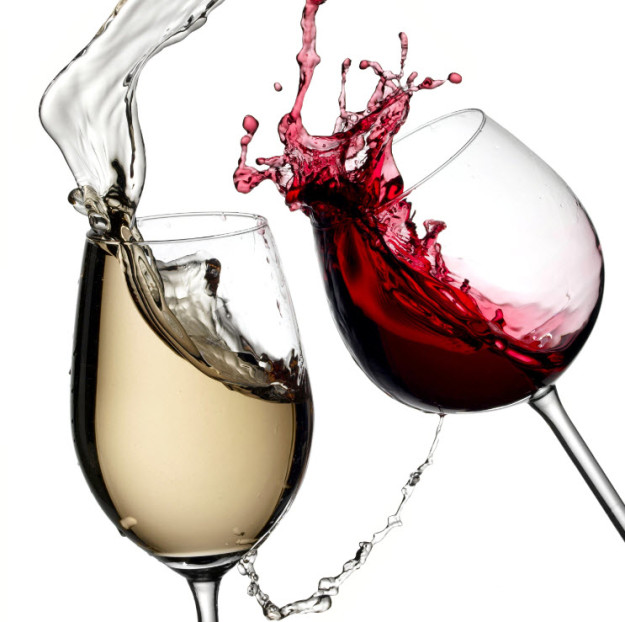

<font color='RED'> About the quality of Wine </font>
- Fixed acidity: are non-volatile acids that do not evaporate
- Volatile acidity: are high acetic acid in wine which leads to an unpleasant vinegar taste
- Citric Acid: acts as a preservative to increase acidity
- Residual sugar: is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance between — sweetness and sourness (wines > 45g/ltrs are sweet)    
- Alcohol: the amount of alcohol in wine
- Residual sugar: is the amount of sugar remaining after fermentation stops   
- Density: sweeter wines have a higher density 
- Chlorides: the amount of salt in the wine
- Volatile acidity: are high acetic acid in wine which leads to an unpleasant vinegar taste
- Sulphates: a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant
 -Free Sulfur Dioxide: it prevents microbial growth and the oxidation of wine   

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the Dataset

In [2]:
df = pd.read_csv('/Projects/Wine/wine+quality/wine-quality-white-and-red.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:

df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [4]:
#samples of data
df[0:2].T

,0,1
type,white,white
fixed acidity,7.0,6.3
volatile acidity,0.27,0.3
citric acid,0.36,0.34
residual sugar,20.7,1.6
chlorides,0.045,0.049
free sulfur dioxide,45.0,14.0
total sulfur dioxide,170.0,132.0
density,1.001,0.994
pH,3.0,3.3


In [5]:
# quantuty of each quality 
print(df['quality']. value_counts())

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


In [6]:
# quantuty of each type 
print(df['type']. value_counts())

type
white    4898
red      1599
Name: count, dtype: int64


In [7]:
df.shape

(6497, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [9]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.duplicated().sum()

1177

In [11]:
#Dropping Duplicate Records
df.drop_duplicates(inplace=True)

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [13]:
#convert qualit
df['quality']=df['quality'].astype("object")

In [14]:
#filter the continous data
data_numeric=df.select_dtypes(include=np.number)
data_numeric

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
6,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6
...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


### Exploratory Data Analysis

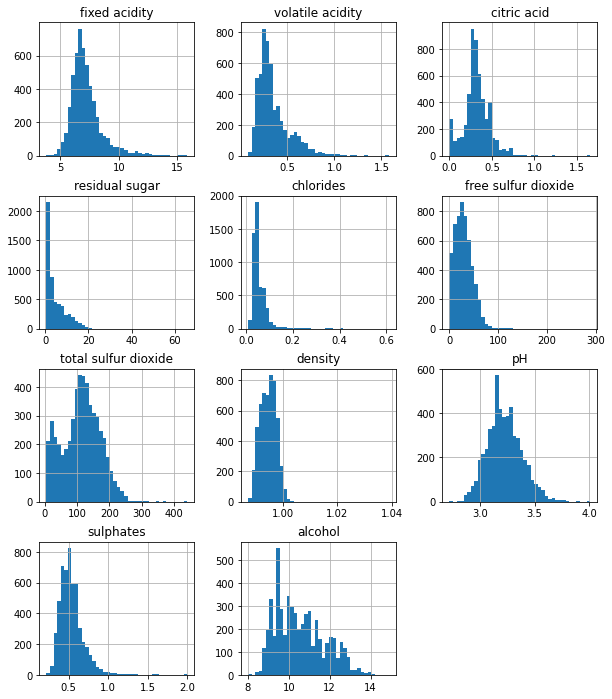

In [15]:

data_numeric.hist(bins=40,figsize=(10,12))

plt.show()

In [16]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = data_numeric.corr()

<Axes: >

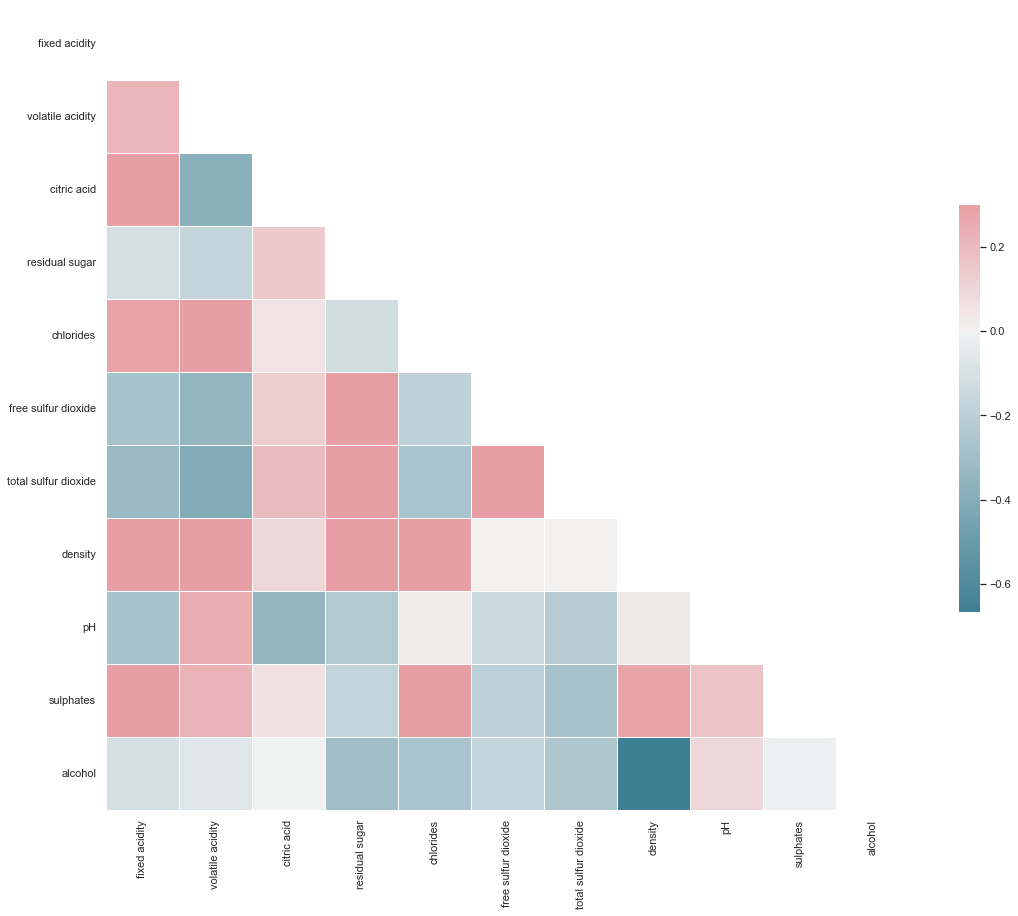

In [17]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

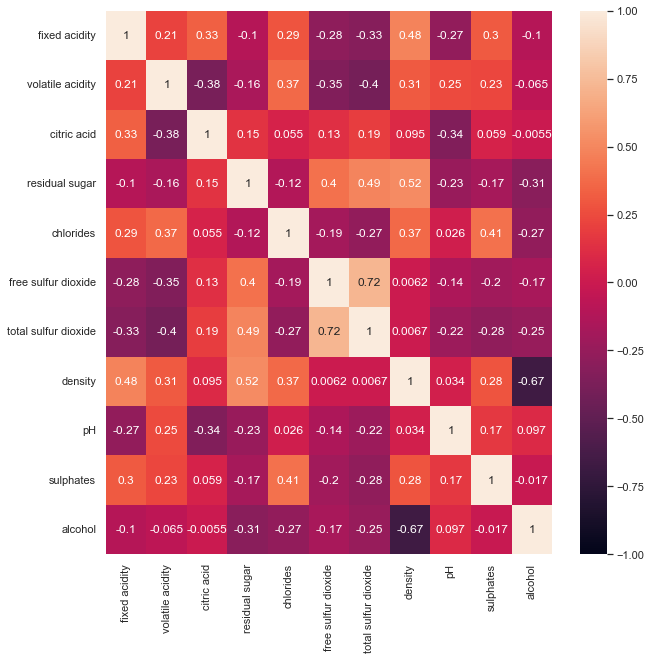

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(data_numeric.corr(), annot=True, vmin= -1, vmax=1)

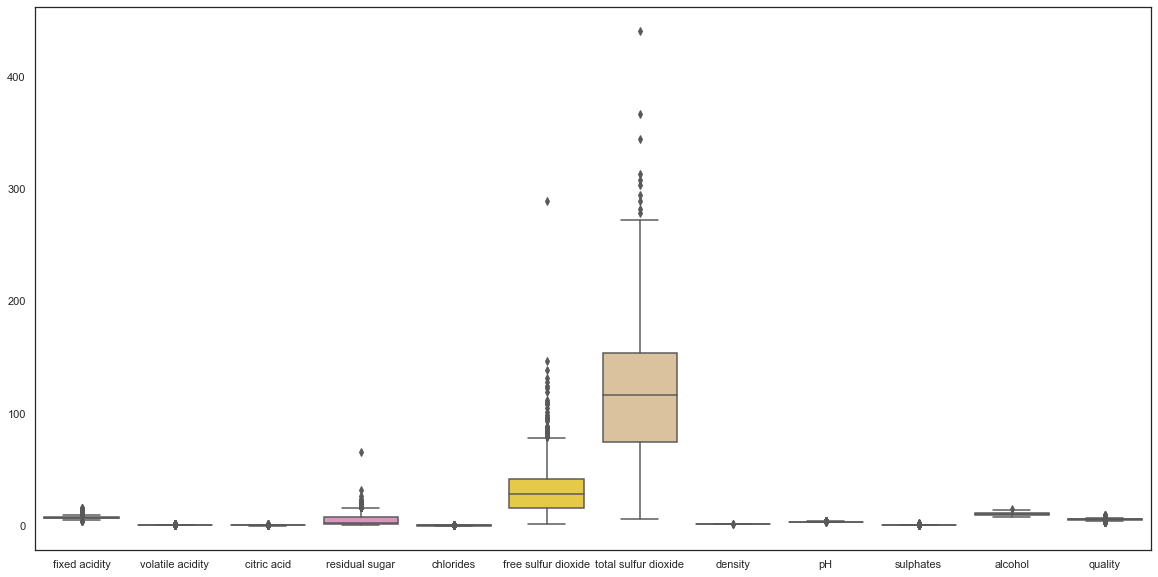

In [19]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = df, palette = "Set2")
plt.show()

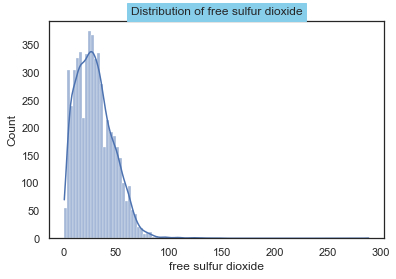

In [20]:
sns.histplot(data = df, x = 'free sulfur dioxide', kde = True, color = 'b')
plt.title('Distribution of free sulfur dioxide', backgroundcolor = 'skyblue')
plt.show()

In [21]:
Q1 = df["free sulfur dioxide"].quantile(0.25)
print(Q1)

16.0


In [22]:
Q3 = df["free sulfur dioxide"].quantile(0.75)
print(Q3)

41.0


In [23]:
IQR = Q3 - Q1
print(IQR)

25.0


In [24]:
lower_limit = Q1 - 1.5 *(IQR)
upper_limit = Q3 + 1.5 *(IQR)
print(lower_limit, upper_limit)

-21.5 78.5


In [25]:
df["free sulfur dioxide"].shape

(5320,)

In [26]:
df2 = df[(df["free sulfur dioxide"] > lower_limit) & (df["free sulfur dioxide"] < upper_limit)]

In [27]:
df2["free sulfur dioxide"].shape

(5276,)

In [28]:
df.shape[0] - df2.shape[0]

44

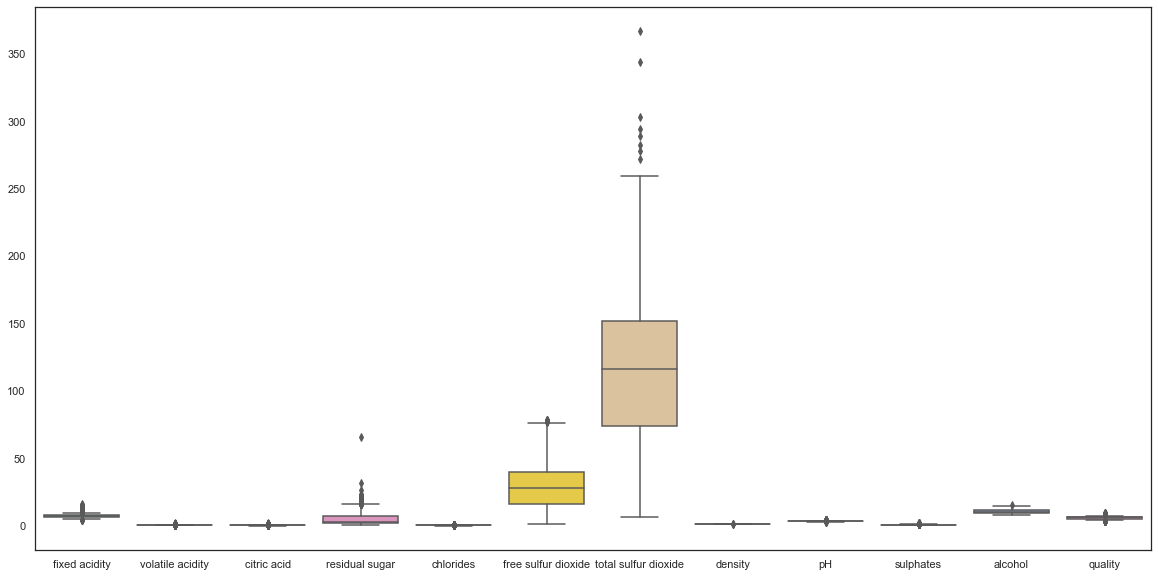

In [29]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = df2, palette = "Set2")
plt.show()

In [30]:
Q1 = df2["total sulfur dioxide"].quantile(0.25)
print(Q1)

74.0


In [31]:
Q3 = df2["total sulfur dioxide"].quantile(0.75)
print(Q3)

152.0


In [32]:
IQR = Q3 - Q1
print(IQR)

78.0


In [33]:
lower_limit = Q1 - 1.5 *(IQR)
upper_limit = Q3 + 1.5 *(IQR)
print(lower_limit, upper_limit)

-43.0 269.0


In [34]:
df2["total sulfur dioxide"].shape

(5276,)

In [35]:
df3 = df2[(df2['total sulfur dioxide'] > lower_limit) & (df2['total sulfur dioxide'] < upper_limit)]

In [36]:
df3["total sulfur dioxide"].shape

(5268,)

In [37]:
df2.shape[0] - df3.shape[0]

8

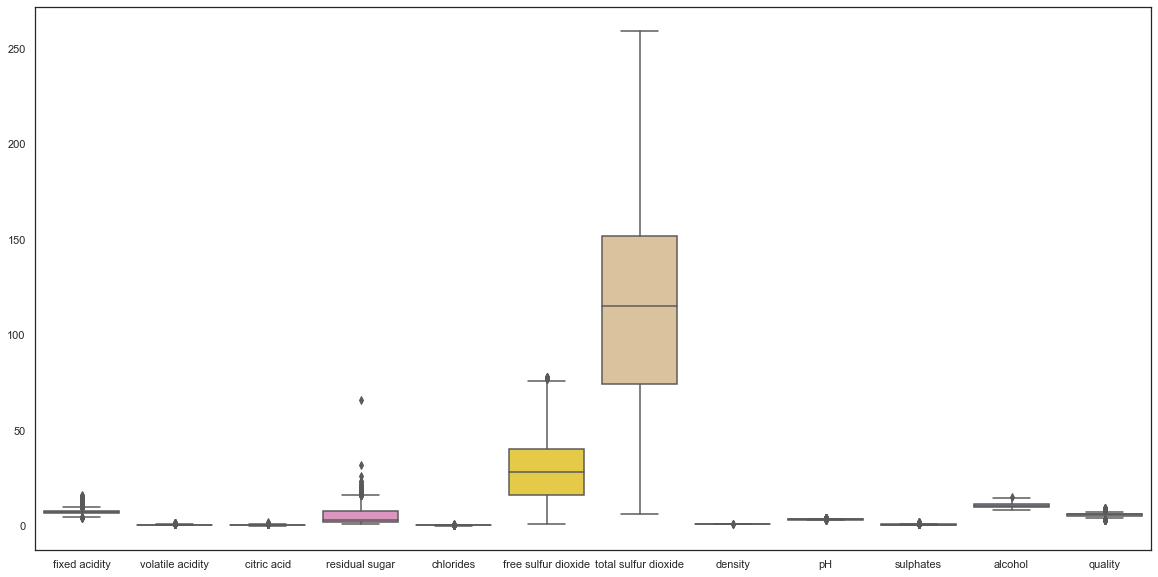

In [38]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = df3, palette = "Set2")
plt.show()

In [39]:
Q1 = df3["residual sugar"].quantile(0.25)
print(Q1)

1.8


In [40]:
Q3 = df3["residual sugar"].quantile(0.75)
print(Q3)

7.4


In [41]:
IQR = Q3 - Q1
print(IQR)

5.6000000000000005


In [42]:
lower_limit = Q1 - 1.5 *(IQR)
upper_limit = Q3 + 1.5 *(IQR)
print(lower_limit, upper_limit)

-6.6000000000000005 15.8


In [43]:
df3["residual sugar"].shape

(5268,)

In [44]:
df4 = df3[(df3['residual sugar'] > lower_limit) & (df3['residual sugar'] < upper_limit)]

In [45]:
df3.shape[0] - df4.shape[0]

154

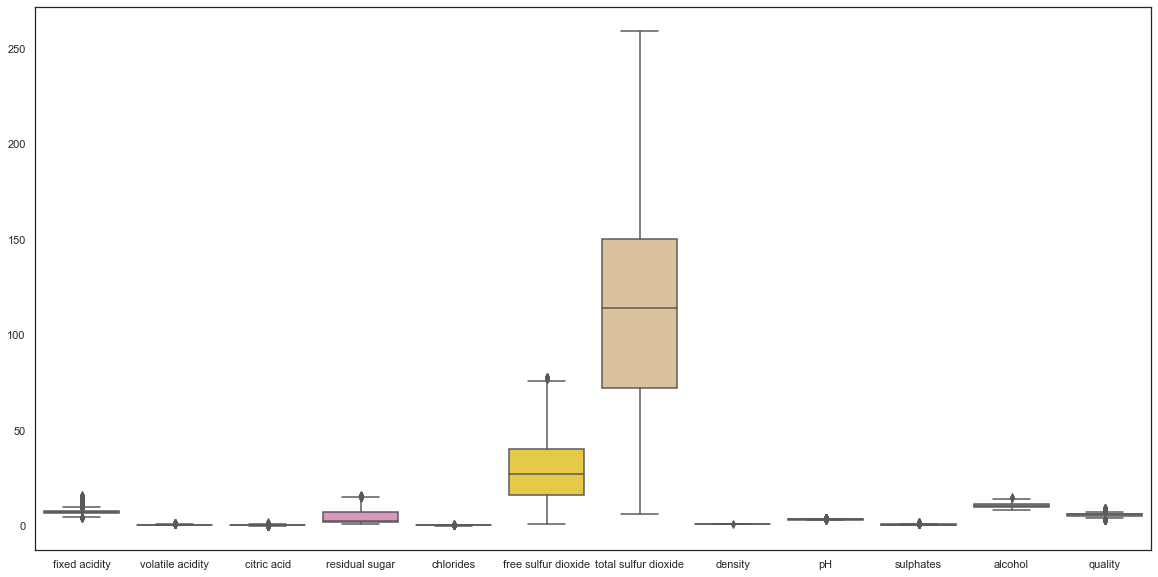

In [46]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = df4, palette = "Set2")
plt.show()

<Axes: ylabel='Frequency'>

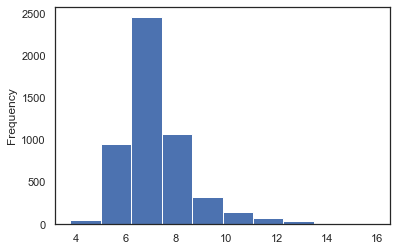

In [47]:
df4['fixed acidity'].plot(kind='hist')

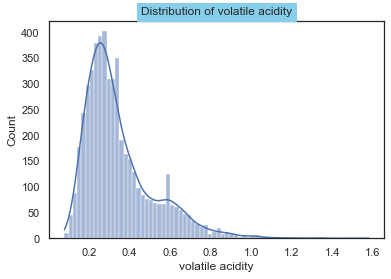

In [48]:
sns.histplot(data = df4, x = 'volatile acidity', kde = True, color = 'b')
plt.title('Distribution of volatile acidity', backgroundcolor = 'skyblue')
plt.show()

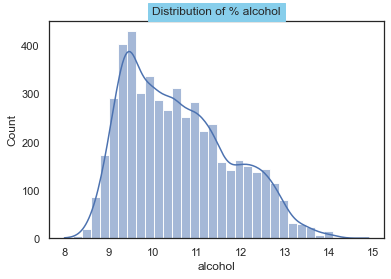

In [49]:
sns.histplot(data = df4, x = 'alcohol', kde = True, color = 'b')
plt.title('Distribution of % alcohol', backgroundcolor = 'skyblue')
plt.show()

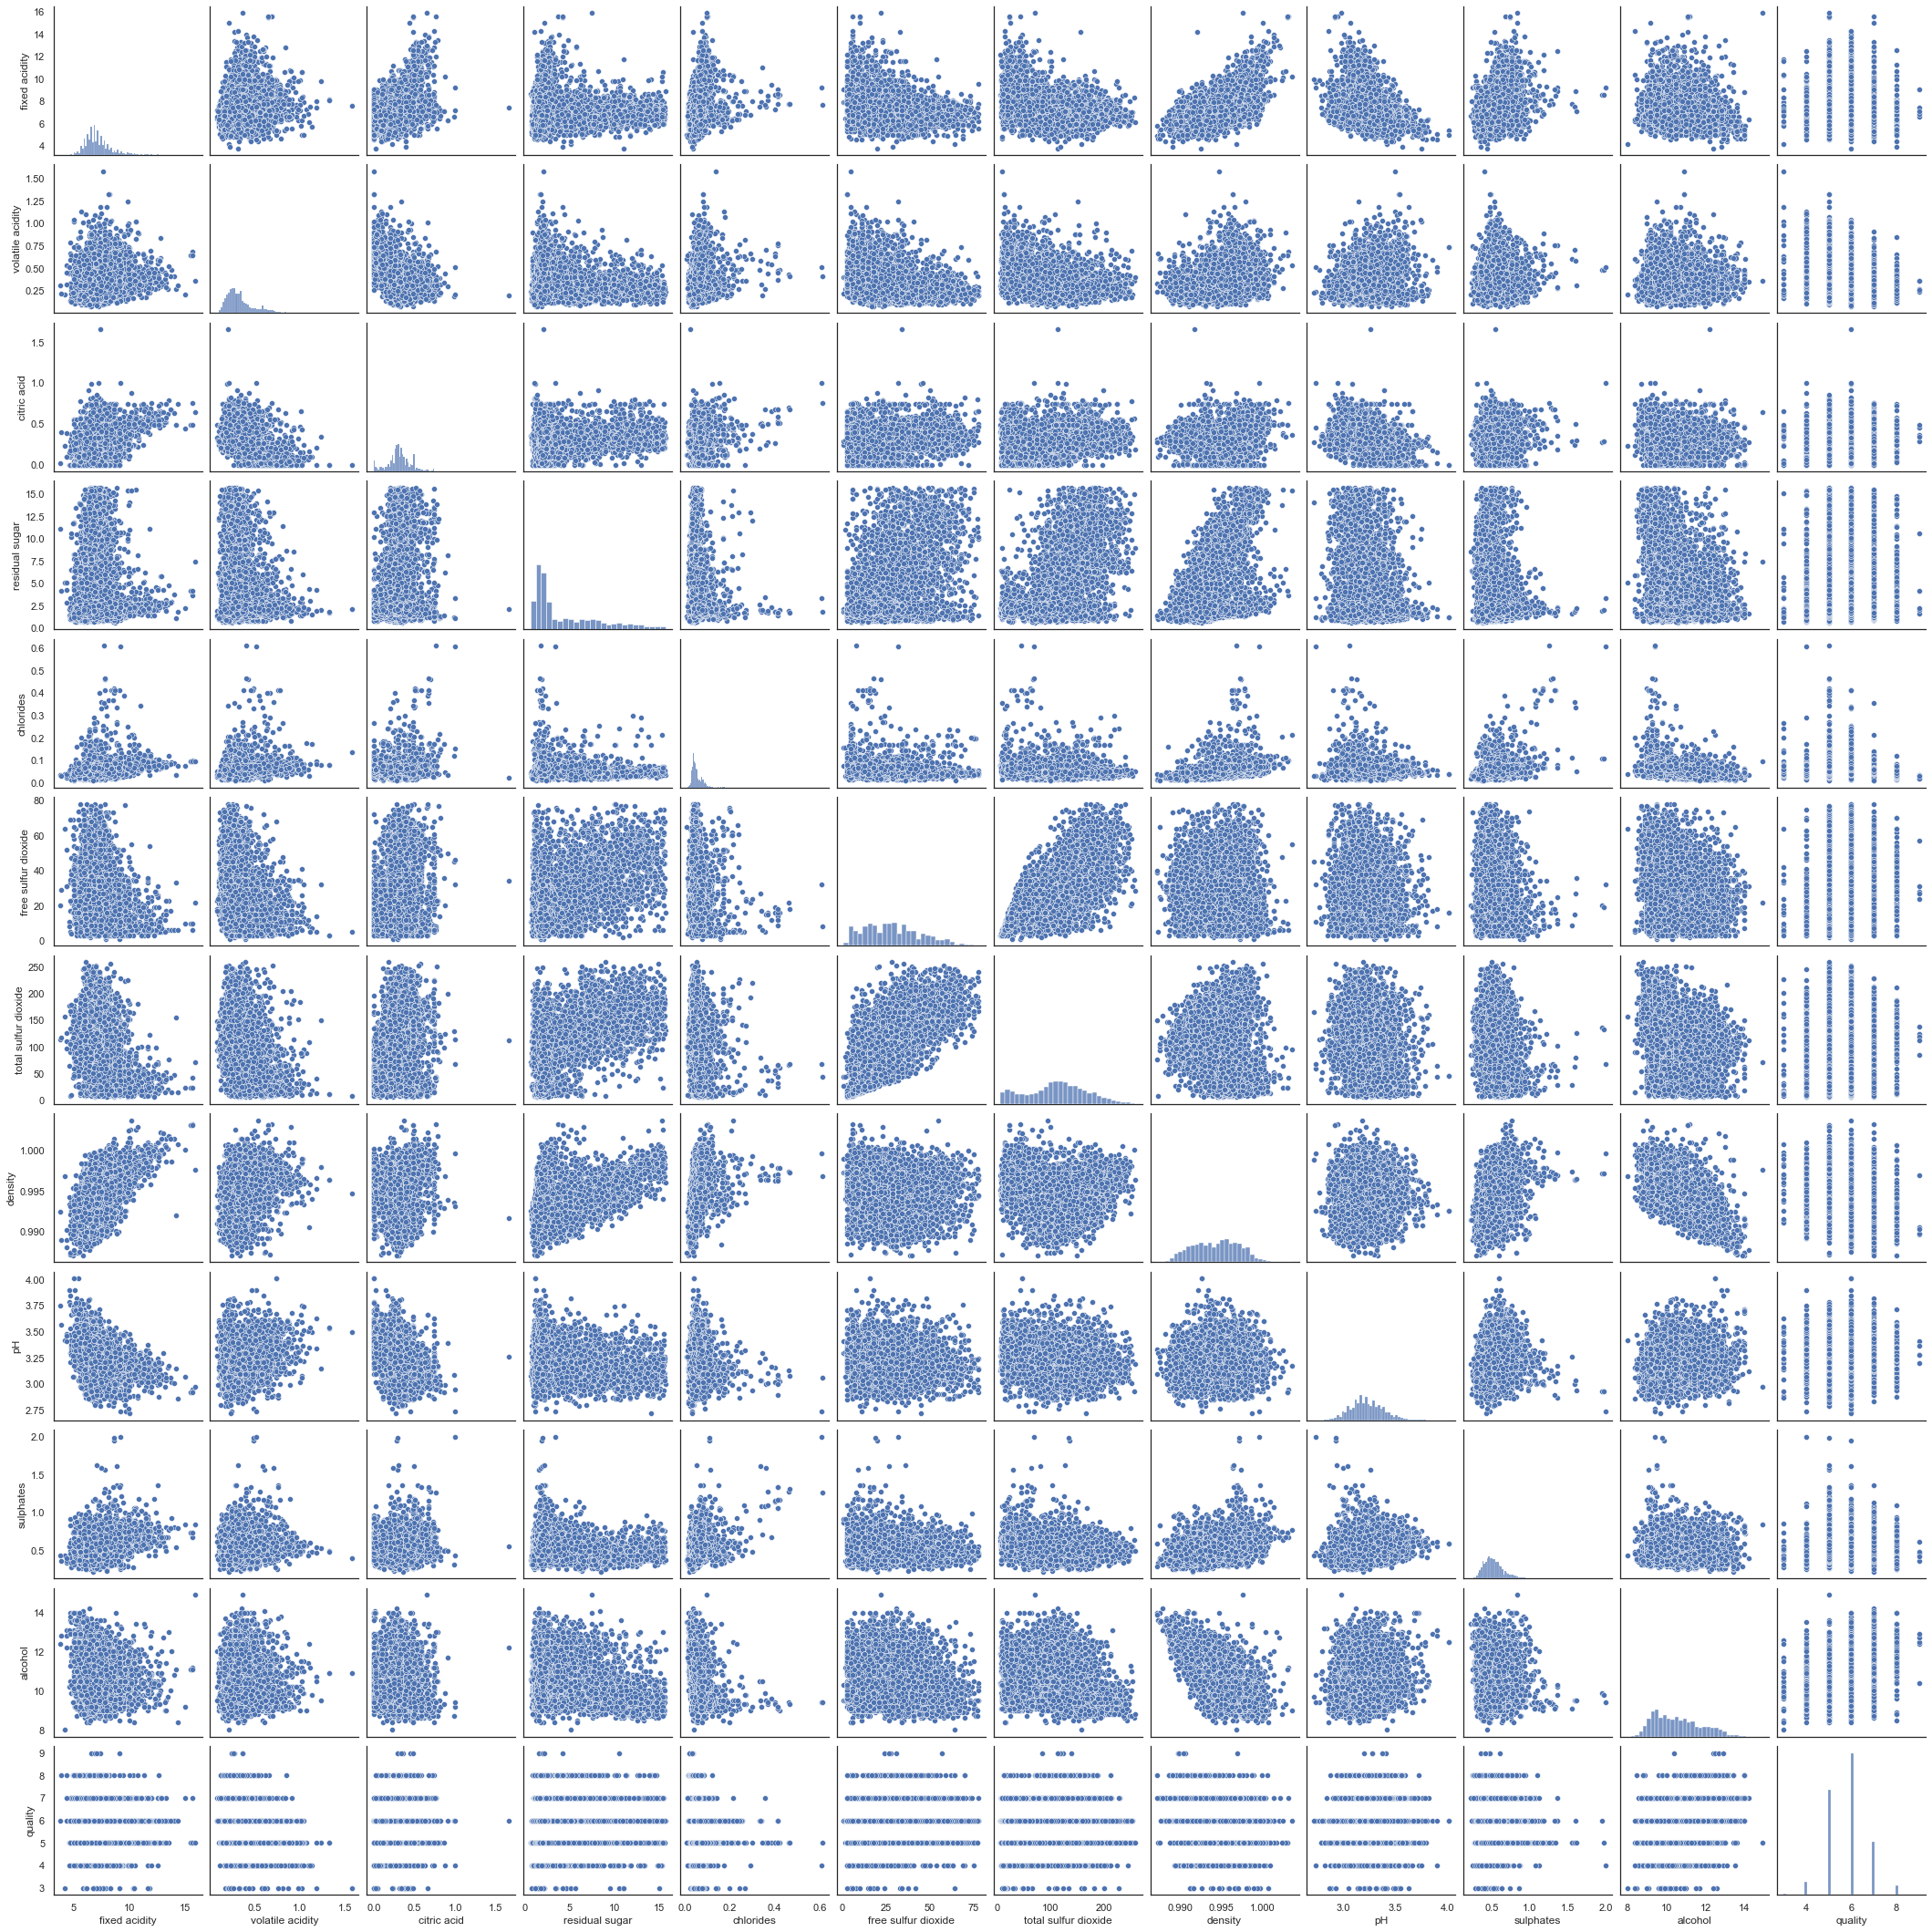

In [50]:
sns.pairplot(df4)

<Axes: xlabel='quality', ylabel='count'>

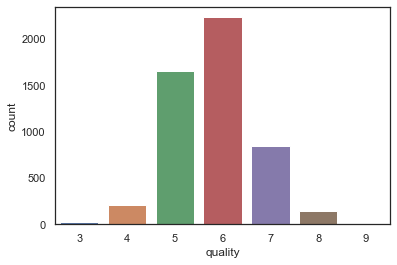

In [51]:
# using the barplot to check the differnt "quality"s of wines and their counts
sns.countplot(x = "quality", data = df4)

<Axes: xlabel='quality', ylabel='alcohol'>

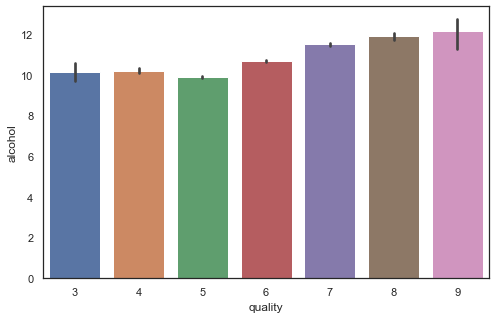

In [52]:
plt.figure(figsize = (8,5))
sns.barplot(x='quality', y = 'alcohol', data = df4)

<Axes: xlabel='quality', ylabel='volatile acidity'>

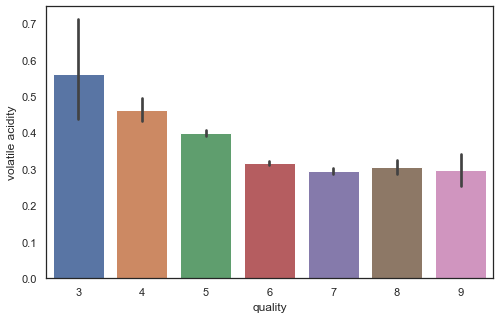

In [53]:
plt.figure(figsize = (8,5))
sns.barplot(x='quality', y = 'volatile acidity', data = df4)

<Axes: xlabel='quality', ylabel='citric acid'>

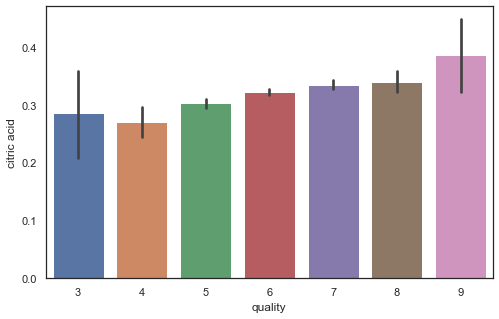

In [54]:
plt.figure(figsize = (8,5))
sns.barplot(x='quality', y = 'citric acid', data = df4)

### Predict

In [55]:
wine=df4.copy()

In [56]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [57]:
wine['best quality'] = [1 if x > 5 else 0 for x in wine.quality]

In [58]:
wine.replace({'white': 1, 'red': 0}, inplace=True)

In [59]:
from sklearn.model_selection import train_test_split
features = wine.drop(['quality', 'best quality'], axis=1)
target = wine['best quality']
 
xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=40)
 
xtrain.shape, xtest.shape

((4091, 12), (1023, 12))

In [61]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [74]:
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix,classification_report

models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf'),
          RandomForestClassifier(n_estimators=100,random_state=3,criterion='entropy'),DecisionTreeClassifier()]
 
for i in range(5):
    models[i].fit(xtrain, ytrain)
 
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(
        ytest, models[i].predict(xtest)))
    print()

LogisticRegression() : 
Training Accuracy :  0.714712153736544
Validation Accuracy :  0.7133767497567183

[21:55:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) :

Confusion Matrix:
[[208 158]
 [ 93 564]]


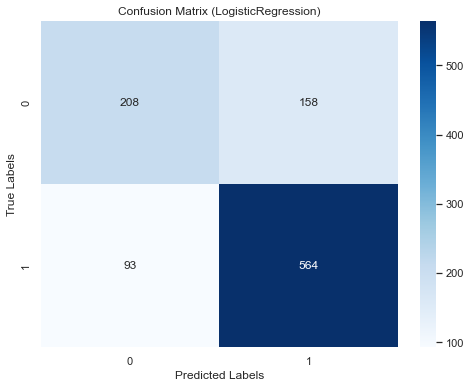

In [79]:
 cm = confusion_matrix(ytest, models[0].predict(xtest))
 print('Confusion Matrix:')
 print(cm)
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (LogisticRegression)")
plt.show()
    

In [72]:
#LogisticRegression
print(metrics.classification_report(ytest,
                                    models[0].predict(xtest)))

              precision    recall  f1-score   support

           0       0.69      0.57      0.62       366
           1       0.78      0.86      0.82       657

    accuracy                           0.75      1023
   macro avg       0.74      0.71      0.72      1023
weighted avg       0.75      0.75      0.75      1023



Confusion Matrix:
[[232 134]
 [107 550]]


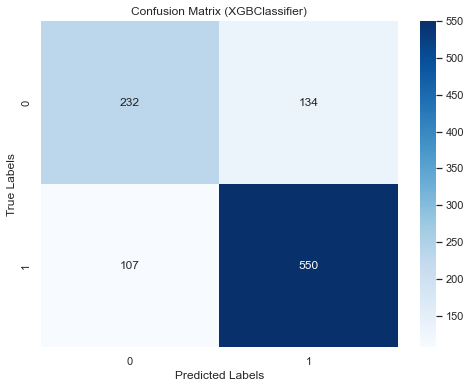

In [80]:
 cm = confusion_matrix(ytest, models[1].predict(xtest))
 print('Confusion Matrix:')
 print(cm)
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (XGBClassifier)")
plt.show()
    

In [73]:
#XGBClassifier
print(metrics.classification_report(ytest,
                                    models[1].predict(xtest)))

              precision    recall  f1-score   support

           0       0.68      0.63      0.66       366
           1       0.80      0.84      0.82       657

    accuracy                           0.76      1023
   macro avg       0.74      0.74      0.74      1023
weighted avg       0.76      0.76      0.76      1023



Confusion Matrix:
[[228 138]
 [ 89 568]]


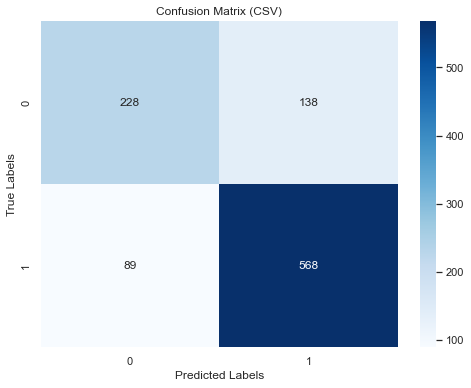

In [81]:
 cm = confusion_matrix(ytest, models[2].predict(xtest))
 print('Confusion Matrix:')
 print(cm)
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (CSV)")
plt.show()
    

In [82]:
#CSV
print(metrics.classification_report(ytest,
                                    models[2].predict(xtest)))

              precision    recall  f1-score   support

           0       0.72      0.62      0.67       366
           1       0.80      0.86      0.83       657

    accuracy                           0.78      1023
   macro avg       0.76      0.74      0.75      1023
weighted avg       0.77      0.78      0.77      1023



Confusion Matrix:
[[240 126]
 [ 94 563]]


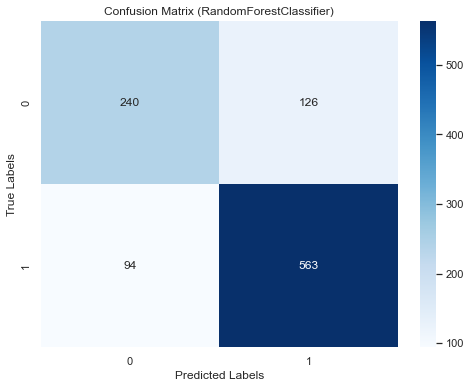

In [83]:
 cm = confusion_matrix(ytest, models[3].predict(xtest))
 print('Confusion Matrix:')
 print(cm)
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (RandomForestClassifier)")
plt.show()
    

In [84]:
#RandomForestClassifier
print(metrics.classification_report(ytest,
                                    models[3].predict(xtest)))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69       366
           1       0.82      0.86      0.84       657

    accuracy                           0.78      1023
   macro avg       0.77      0.76      0.76      1023
weighted avg       0.78      0.78      0.78      1023



Confusion Matrix:
[[213 153]
 [154 503]]


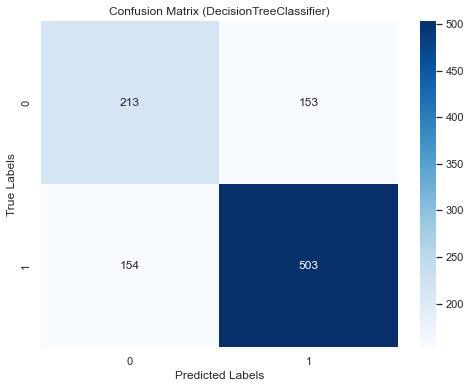

In [85]:
 cm = confusion_matrix(ytest, models[4].predict(xtest))
 print('Confusion Matrix:')
 print(cm)
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (DecisionTreeClassifier)")
plt.show()
    

In [86]:
#DecisionTreeClassifier
print(metrics.classification_report(ytest,
                                    models[4].predict(xtest)))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58       366
           1       0.77      0.77      0.77       657

    accuracy                           0.70      1023
   macro avg       0.67      0.67      0.67      1023
weighted avg       0.70      0.70      0.70      1023

